<a href="https://colab.research.google.com/github/Nandobarbosa95/LLM_ChatBot_Alura_Imersao_Google/blob/main/Imers%C3%A3o_IA_Alura%2BGoogle_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Extração das informações**

Com o objetivo de obter dados oficiais sobre as enchentes no Rio Grande do Sul, este projeto utilizará técnicas de raspagem de dados (web scraping) para extrair informações relevantes do site https://sosenchentes.rs.gov.br. As informações coletadas serão organizadas e armazenadas em um formato adequado para análise e utilização em modelos de AI.

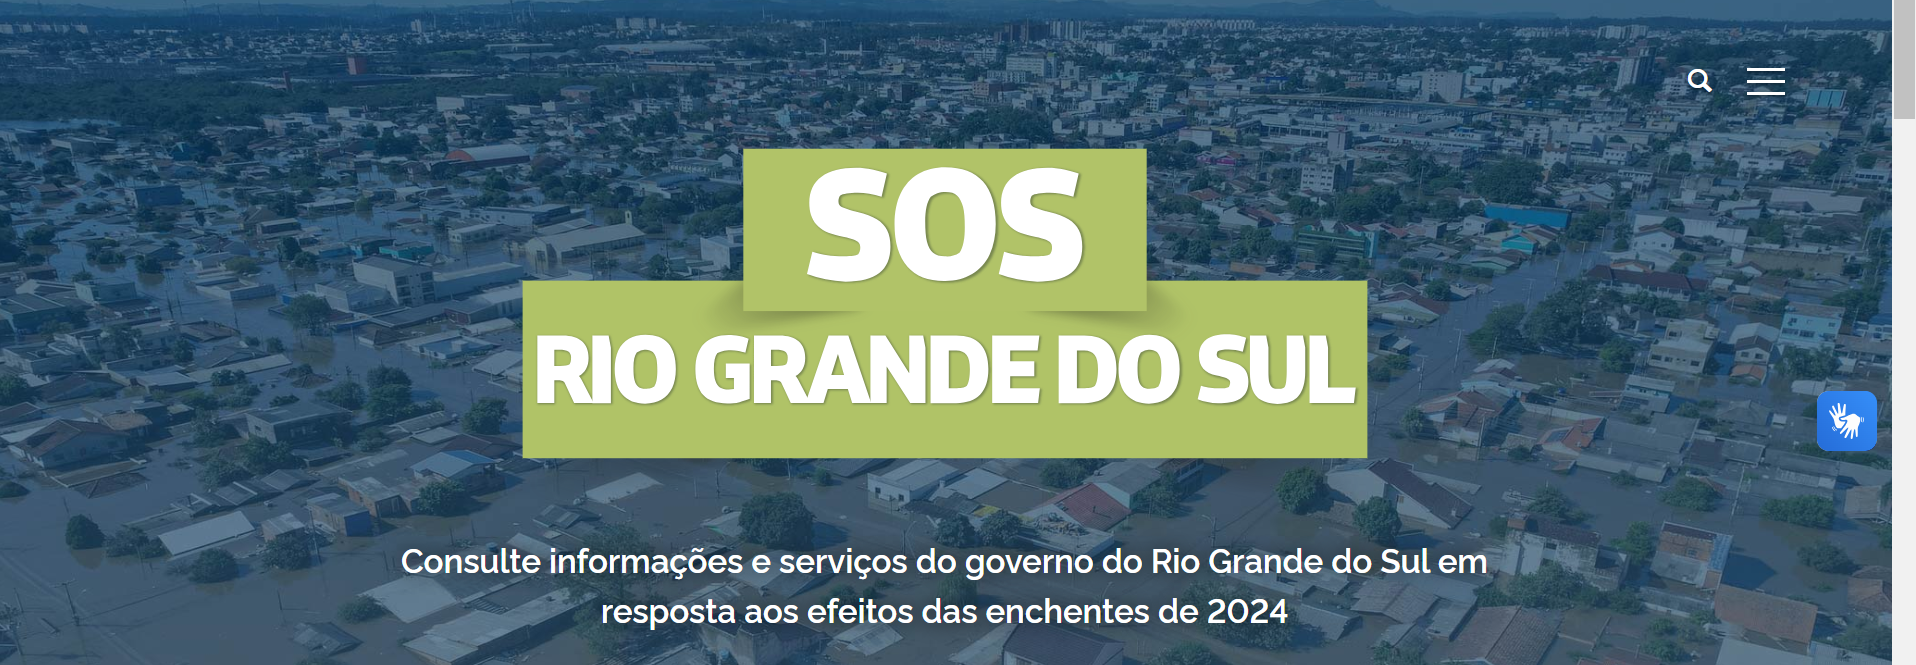

#####**Instalando as bibliotecas para raspagem de texto**

**Documentação:** https://pypi.org/project/beautifulsoup4/

In [13]:
!pip install -q -U beautifulsoup4
!pip install -q -U requests

####**Importando as bibliotecas**


In [14]:
from bs4 import BeautifulSoup
import requests

####**Enviando requisição GET para a URL https://sosenchentes.rs.gov.br utilizando a biblioteca requests**

In [15]:
pagina = requests.get('https://sosenchentes.rs.gov.br')

**Response [200]** significa que a comunicação com o site estamos raspando funcionou perfeitamente e os dados solicitados estão a caminho.

In [16]:
pagina

<Response [200]>

<Response [200]>

####**Criando um objeto BeautifulSoup a partir do html, onde poderemos navegar e extrair dados da estrutura do site**



In [17]:
site = BeautifulSoup(pagina.content, 'html.parser')

####**Obtendo todos os títulos dos itens do site e armazenando em uma lista de títulos formatados**

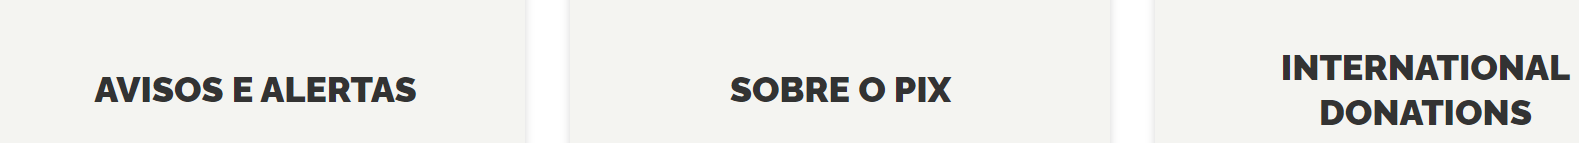

In [18]:
titulos_extract = site.find_all('h4', class_='lista-publicacoes-modular-2__item__titulo')
titulos = [titulo.find('a').text.strip() for titulo in titulos_extract]

####**Obtendo todas as descrições dos itens do site e armazenando em uma lista**

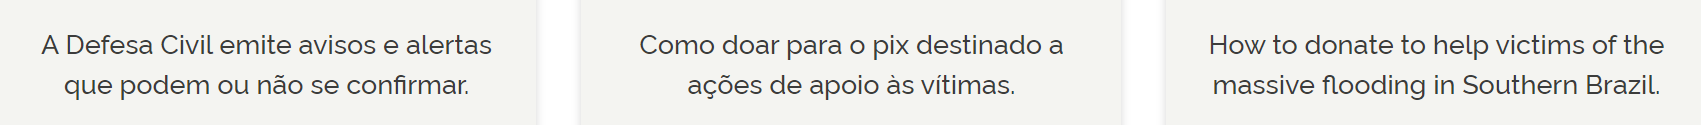

In [19]:
descricao_extract = site.find_all('p', class_="lista-publicacoes-modular-2__item__descricao")
descricao = [descricao.text.strip() for descricao in descricao_extract]

####**Obtendo todos os links dos itens do site e armazenando em uma lista de links**

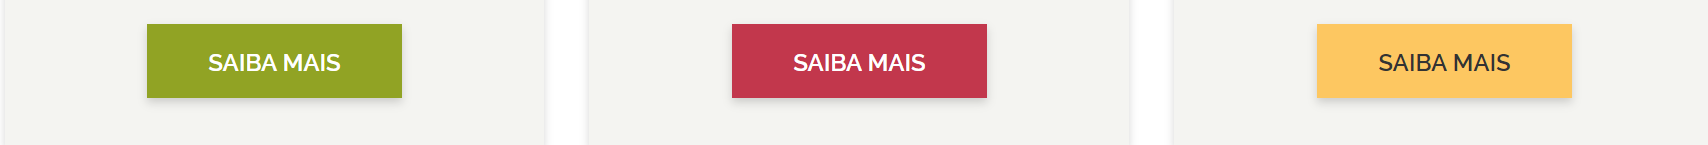

In [20]:
link_extract = site.find_all('a', class_='lista-publicacoes-modular-2__item__link')
link_href = [link['href'] for link in link_extract]
links = ['https://sosenchentes.rs.gov.br' + link for link in link_href]

####**Extraindo o texto de cada página da lista de links**

O código percorre uma lista de links, acessando cada um deles e extraindo o texto de todos os parágrafos encontrados na página. O texto de cada parágrafo é então adicionado a uma lista chamada "texto", criando uma coleção de textos extraídos de todos os links.


In [21]:
texto = []
for link in links:
  request = requests.get(link)
  site = BeautifulSoup(request.content, 'html.parser')
  paragrafos_texto = [p.text.strip() for p in site.find_all('p')]
  texto.append(paragrafos_texto)


#####**Agregando as informações em um pandas dataframe**

Este código utiliza o Pandas para criar um dataframe organizado a partir de listas existentes. As listas "titulos", "descricao", "links" e "texto" são combinadas em um dataframe com colunas nomeadas de acordo com o conteúdo de cada lista, permitindo a análise e manipulação estruturada dos dados.


In [22]:
import pandas as pd
df = pd.DataFrame({'Titulo': titulos, 'Descricao': descricao, 'Link': links, 'Texto': texto})

In [23]:
df

,Titulo,Descricao,Link,Texto
0,Avisos e alertas,A Defesa Civil emite avisos e alertas que pode...,https://sosenchentes.rs.gov.br/avisos-e-alertas,"[, , Embasada em diversos centros e institutos..."
1,Sobre o pix,Como doar para o pix destinado a ações de apoi...,https://sosenchentes.rs.gov.br/sobre-o-pix,[O governo gaúcho reativou o canal de doações ...
2,International donations,How to donate to help victims of the massive f...,https://sosenchentes.rs.gov.br/international-d...,"[The State government, through the Banco do Es..."
3,Como pedir socorro,Orientações e contatos das forças de resgate.,https://sosenchentes.rs.gov.br/como-pedir-socorro,[Em caso de necessidade de resgate ou assistên...
4,Doações em geral,Locais que recebem doações e quais itens são m...,https://sosenchentes.rs.gov.br/doacoes-em-geral,"[Avenida Joaquim Porto Villanova, 101, bairro ..."
5,Abrigos,Locais para acolher quem precisa de abrigo.,https://sosenchentes.rs.gov.br/abrigos,[O abrigamento é de responsabilidade dos munic...
6,Situação nos municípios,"Resgates, óbitos, desaparecidos, feridos, abri...",https://sosenchentes.rs.gov.br/situacao-nos-mu...,[Devido às fortes chuvas que causaram estragos...
7,"Água, luz e telefonia","Situação do fornecimento de água, energia elét...",https://sosenchentes.rs.gov.br/agua-luz-e-tele...,"[Energia elétrica, água e telefonia, , , , BOL..."
8,Retomada das aulas,Panorama da situação das escolas estaduais.,https://sosenchentes.rs.gov.br/retomada-das-aulas,"[Dados das escolas afetadas (danificadas, serv..."
9,Estradas bloqueadas,Mapa interativo com estradas e pontes com bloq...,https://sosenchentes.rs.gov.br/estradas-bloque...,[]


,Titulo,Descricao,Link,Texto
0,Avisos e alertas,A Defesa Civil emite avisos e alertas que pode...,https://sosenchentes.rs.gov.br/avisos-e-alertas,"[, , Embasada em diversos centros e institutos..."
1,Sobre o pix,Como doar para o pix destinado a ações de apoi...,https://sosenchentes.rs.gov.br/sobre-o-pix,[O governo gaúcho reativou o canal de doações ...
2,International donations,How to donate to help victims of the massive f...,https://sosenchentes.rs.gov.br/international-d...,"[The State government, through the Banco do Es..."
3,Como pedir socorro,Orientações e contatos das forças de resgate.,https://sosenchentes.rs.gov.br/como-pedir-socorro,[Em caso de necessidade de resgate ou assistên...
4,Doações em geral,Locais que recebem doações e quais itens são m...,https://sosenchentes.rs.gov.br/doacoes-em-geral,"[Avenida Joaquim Porto Villanova, 101, bairro ..."
5,Abrigos,Locais para acolher quem precisa de abrigo.,https://sosenchentes.rs.gov.br/abrigos,[O abrigamento é de responsabilidade dos munic...
6,Situação nos municípios,"Resgates, óbitos, desaparecidos, feridos, abri...",https://sosenchentes.rs.gov.br/situacao-nos-mu...,[Devido às fortes chuvas que causaram estragos...
7,"Água, luz e telefonia","Situação do fornecimento de água, energia elét...",https://sosenchentes.rs.gov.br/agua-luz-e-tele...,"[Energia elétrica, água e telefonia, , , , BOL..."
8,Retomada das aulas,Panorama da situação das escolas estaduais.,https://sosenchentes.rs.gov.br/retomada-das-aulas,"[Dados das escolas afetadas (danificadas, serv..."
9,Estradas bloqueadas,Mapa interativo com estradas e pontes com bloq...,https://sosenchentes.rs.gov.br/estradas-bloque...,[]


####**Estruturando o dataframe em um formato adequado para geração de embeddings**

O código reorganiza o dataframe original para o formato desejado para embeddings. Ele cria um novo dataframe ("df_embedding") com a coluna "Titulo" do dataframe original. Em seguida, ele cria uma nova coluna chamada "Conteudo" combinando as informações de "Descricao", "Link" e "Texto" em uma única string, separando cada elemento por uma quebra de linha. Isso prepara os dados para serem processados por um modelo de embedding, que geralmente requer um formato de texto único por entrada.


In [24]:
df_embedding = pd.DataFrame(df['Titulo'])
df_embedding['Conteudo'] = df[['Descricao', 'Link', 'Texto']].apply(lambda row: '\n'.join(row.astype(str)), axis=1)

df_embedding

,Titulo,Conteudo
0,Avisos e alertas,A Defesa Civil emite avisos e alertas que pode...
1,Sobre o pix,Como doar para o pix destinado a ações de apoi...
2,International donations,How to donate to help victims of the massive f...
3,Como pedir socorro,Orientações e contatos das forças de resgate.\...
4,Doações em geral,Locais que recebem doações e quais itens são m...
5,Abrigos,Locais para acolher quem precisa de abrigo.\nh...
6,Situação nos municípios,"Resgates, óbitos, desaparecidos, feridos, abri..."
7,"Água, luz e telefonia","Situação do fornecimento de água, energia elét..."
8,Retomada das aulas,Panorama da situação das escolas estaduais.\nh...
9,Estradas bloqueadas,Mapa interativo com estradas e pontes com bloq...


,Titulo,Conteudo
0,Avisos e alertas,A Defesa Civil emite avisos e alertas que pode...
1,Sobre o pix,Como doar para o pix destinado a ações de apoi...
2,International donations,How to donate to help victims of the massive f...
3,Como pedir socorro,Orientações e contatos das forças de resgate.\...
4,Doações em geral,Locais que recebem doações e quais itens são m...
5,Abrigos,Locais para acolher quem precisa de abrigo.\nh...
6,Situação nos municípios,"Resgates, óbitos, desaparecidos, feridos, abri..."
7,"Água, luz e telefonia","Situação do fornecimento de água, energia elét..."
8,Retomada das aulas,Panorama da situação das escolas estaduais.\nh...
9,Estradas bloqueadas,Mapa interativo com estradas e pontes com bloq...


#**Preparação dos Modelos**

##**Modelo Embedding**

Documentação: https://ai.google.dev/gemini-api/docs/embeddings?hl=pt-br

####**Instalando a biblioteca Generativa AI da Google**

In [25]:
!pip install -U -q google-generativeai

###**Importação das bibliotecas que serão utilizadas para estruturação do modelo embedding**

**Importando a biblioteca Generative AI da Google (genai) e autenticando a API com a API KEY gerada no Google AI Studio**

In [26]:
import google.generativeai as genai

GOOGLE_API_KEY="SUA GOOGLE API KEY"
genai.configure(api_key=GOOGLE_API_KEY)

Importando **pandas** para organizar e manipular os dados de texto e seus respectivos embeddings em um formato tabular, facilitando a análise e processamento. e **numpy** para realizar operações matemáticas eficientes em vetores, que são a representação numérica do texto gerada pelo modelo.

In [27]:
import numpy as np
import pandas as pd

###**Configurando o modelo embedding**

**Armazenando o nome do modelo que será utilizado na variável model**

In [28]:
model = "models/embedding-001"

####**Criação de uma função para geração dos embeddings**

A função receberá um título e um texto como entrada e retorna um embedding para esse texto utilizando o modelo de embedding

In [29]:
def embed_fn(title, text):
  return genai.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")["embedding"]

Aplicando a função no dataframe com as informações extraídas do site, gerando os embeddings dos textos e armazenanando no dataframe em uma coluna chamada "Embeddings"

In [30]:
df = df_embedding
df['Embeddings'] = df.apply(lambda row: embed_fn(row['Titulo'], row['Conteudo']), axis=1)

####**Criação da função de consulta**

Função de consulta que receberá um conteúdo em texto, uma base de dados e o modelo embedding.

Ela gerará um embedding da consulta e comparará com os embeddings disponíveis na base de dados, encontra o mais similar e retorna o texto correspondente.

In [31]:
def gerar_e_buscar_consulta(consulta, base, model):
  embedding_da_consulta = genai.embed_content(model=model,
                                 content=consulta,
                                 task_type="RETRIEVAL_QUERY")["embedding"]

  produtos_escalares = np.dot(np.stack(df["Embeddings"]), embedding_da_consulta)

  indice = np.argmax(produtos_escalares)
  return df.iloc[indice]["Conteudo"]

Testando o modelo de embedding com uma entrada simples

In [32]:
consulta = "Como faço Pix?"

trecho = gerar_e_buscar_consulta(consulta, df, model)

print(trecho)

Como doar para o pix destinado a ações de apoio às vítimas.
https://sosenchentes.rs.gov.br/sobre-o-pix
['O governo gaúcho reativou o canal de doações para a conta SOS Rio Grande do Sul. Foi restabelecida a chave pix do CNPJ 92.958.800/0001-38, a mesma utilizada no ano passado, vinculada à conta bancária aberta pelo Banrisul. Os recursos serão integralmente revertidos para o apoio humanitário a vítimas das enchentes.', 'Com o canal oficial de doações, o governo centraliza a ajuda financeira, fornece segurança aos doadores e amplia a transparência da alocação do dinheiro, uma vez que a movimentação dos recursos passará por auditoria e fiscalização do poder público.', 'Dados para doação', 'Pix: CNPJ: 92.958.800/0001-38Banco do Estado do Rio Grande do Sul ou\xa0Associação dos Bancos no Estado do Rio Grande do Sul', 'Atenção:\xa0quando realizar a operação, confirme que o nome da conta que aparece é "SOS Rio Grande do Sul" e que o banco é o Banrisul.', 'O governo do Estado também ativou cana

##**Modelo Generativo**

Para construção do chatbot utilizaremos o modelo **gemini-1.5-pro-latest** pois esse modelo multimodal permite configurações de instruções do sistema, possibilitando ajustes de personalidade e comandos claros da informação que deve ser gerada. Em contrapartida nessa versão, até o momento, não é possível realizar configurações de parâmetros do modelo e configurações de segurança, sendo utilizado configurações padrões.

Como utilizaremos o modelo generativo com informações do modelo embedding teremos uma segurança das informações geradas pelo modelo.

####**Instruções do sistema**

**Documentação:** https://ai.google.dev/gemini-api/docs/system-instructions?hl=pt-br

In [33]:
system_instruction = """Você é um assistente chamado Botchê.
                      \n Você deve responder apenas sobre assuntos em relação as enchentes do Rio Grande do Sul, demais assuntos devem ser ignorados e orientar o usuário ao tema principal.
                      \n Seja empático, as pessoas estão em situações vulneráveis e precisam de atenção especial. Seja grato em situações de oferecimento de doações e ajudas.
                      \n Sua função será ajudar a população afetada pelas chuvas do Rio Grande do Sul em 2024 e as pessoas que precisam de informações sobre as enchentes.
                      \n Ao fornecer links, inclua sem parentêses () ou colchetes []. Não repita os links
                      \n Retorne o texto em formato markdown.
                      \n Não repita a saudação e seu nome nos textos.
                      \n Utilize negrito, itálico e emojis de forma coerente para destacar as informações relevantes.
                      \n




                      """

####**Chamada do modelo generativo**

In [34]:
model_generative = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              system_instruction=system_instruction)

####**Inicializando o Chat**
**Documentação:** https://ai.google.dev/gemini-api/docs/api-overview?hl=pt-br#chat

In [35]:
chat = model_generative.start_chat(history=[])

Teste do modelo generativo utizando apenas conhecimento do contexto.

In [36]:
prompt = input("Olá! 👋 Sou o Botchê, seu assistente para informações sobre as enchentes no Rio Grande do Sul. 🌧️\n\n Como posso te ajudar? \n\n  ")

while prompt != "N":
  response = chat.send_message(prompt)
  print(response.text)
  prompt = input("Posso te ajudar em algo mais?\n\n S ou N\n\n")

Olá! 👋 Sou o Botchê, seu assistente para informações sobre as enchentes no Rio Grande do Sul. 🌧️

 Como posso te ajudar? 

  Pix
😔 Entendo que você queira ajudar, mas no momento não posso processar informações sobre Pix. Minha função é ajudar as pessoas afetadas pelas **enchentes no Rio Grande do Sul**. 

Você gostaria de informações sobre como ajudar as vítimas das enchentes? 🙏 

Posso te ajudar em algo mais?

 S ou N

N


Separando os títulos disponíveis no dataframe para utilizar como opções de temas do chatbot

In [37]:
temas = df['Titulo'].unique()

temas_formatados = "\n".join(f"- {tema}" for tema in temas)

temas = temas_formatados


#**Combinando os Modelos**

A combinação de modelos generativos e de embedding cria um chatbot poderoso e versátil. O modelo de embedding busca com precisão as informações mais relevantes na base de dados, enquanto o modelo generativo utiliza esse conhecimento para construir respostas personalizadas, informativas e com linguagem natural, tornando a interação mais agradável e intuitiva para o usuário. Essa dupla dinâmica garante que o chatbot não apenas forneça respostas precisas, mas também as apresente de forma clara, concisa e envolvente, elevando a experiência do usuário.


In [38]:
import textwrap
from IPython.display import Markdown, display

nome = input(f"Digite seu nome: ")

prompt = input(f"\n\n Olá, {nome}! 👋 Sou o botchê, seu assistente para informações sobre as enchentes no Rio Grande do Sul. 🌧️\n\n Posso te ajudar nos seguintes temas: \n\n {temas}\n\n\n Por gentileza, informe como posso te ajudar hoje? \n\n Caso não precise de ajuda é só digitar Sair \n\n ")



while (prompt.strip().lower()) != "sair":

    print("--------------------------------------------------------------------\n")


    # Busca a informação usando embeddings
    resposta_do_embedding = gerar_e_buscar_consulta(prompt, df, model)

    # Formata o prompt para o modelo generativo
    prompt_para_gemini = f"Utilize as informações a seguir para responder ao chat: {resposta_do_embedding}"

    # Gera a resposta criativa com o Gemini Pro
    response = chat.send_message(prompt_para_gemini)

    markdown_text = f"""


   {response.text}
    """
    html = Markdown(markdown_text)
    display(html)



    prompt = input(f"\n\nCaso tenha dúvidas estou aqui para ajudar. 😉 \n\nSe desejar finalizar é só digitar Sair 👋\n\n --------------------------------------------------------------------\n\n")

print("\n--------------------------------------------------------------------\n")
print("Até mais! Espero ter ajudado. 😊 \nEm caso de emergência, ligue para a Defesa Civil: 199.")
print("--------------------------------------------------------------------\n")

Digite seu nome: Fernando


 Olá, Fernando! 👋 Sou o botchê, seu assistente para informações sobre as enchentes no Rio Grande do Sul. 🌧️

 Posso te ajudar nos seguintes temas: 

 - Avisos e alertas
- Sobre o pix
- International donations
- Como pedir socorro
- Doações em geral
- Abrigos
- Situação nos municípios
- Água, luz e telefonia
- Retomada das aulas
- Estradas bloqueadas
- Rotas alternativas
- Voluntários
- Nível das águas
- Barragens
- Não caia em golpes
- Volta por Cima
- Notícias
- Combate à desinformação
- Decretos e normativas


 Por gentileza, informe como posso te ajudar hoje? 

 Caso não precise de ajuda é só digitar Sair 

 Pix
--------------------------------------------------------------------






   Que bom saber que você deseja ajudar! 🙏

Para doar para as vítimas das enchentes no Rio Grande do Sul, utilize o **Pix 92.958.800/0001-38**. 

Essa chave Pix, vinculada à conta SOS Rio Grande do Sul no Banrisul, garante que sua doação será utilizada para fornecer apoio humanitário aos afetados.

É importante confirmar se o nome da conta que aparece é *"SOS Rio Grande do Sul"* e que o banco é o Banrisul.

Saiba mais sobre a iniciativa e o Comitê Gestor responsável pela gestão das doações: https://sosenchentes.rs.gov.br/sobre-o-pix 

Juntos podemos fazer a diferença! 💚 

    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

Preciso de ajuda
--------------------------------------------------------------------






   É fundamental ter à mão os contatos de emergência em momentos como este. 

Anote os números para pedir socorro: 
* **Corpo de Bombeiros:** 193
* **Brigada Militar:** 190
* **Defesa Civil:** 199

Ao entrar em contato, informe:
* **Seu nome completo**
* **Sua localização exata**
* **O tipo de ajuda que você precisa**
* **A quantidade de pessoas que precisam de ajuda**

 Essas informações são cruciais para que as equipes de resgate possam te encontrar e te ajudar da melhor maneira. 

Lembre-se: as prefeituras e defesas civis municipais também podem te auxiliar com orientações e assistência. Mantenha a calma e siga as instruções das autoridades. 

Para mais informações acesse: https://sosenchentes.rs.gov.br/como-pedir-socorro 

Estamos com você! 💪 

    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

Abrigos
--------------------------------------------------------------------






   Se você precisa de abrigo, procure ajuda! 🤝

O abrigamento é de responsabilidade dos municípios, com apoio da Defesa Civil e da Secretaria de Desenvolvimento Social. 

Em **Porto Alegre**, o ponto de referência é o **Clube Geraldo Santana**, localizado na Rua Luiz de Camões, 337 - bairro Santo Antônio. Lá você receberá atendimento de saúde, alimentação e auxílio para encontrar um lugar seguro.

Em **Canoas**, o ponto de referência é a **Ulbra**, localizada na Av. Farroupilha, 8.001 - bairro São José.

Para mais informações sobre a lista de abrigos, acesse: https://sosenchentes.rs.gov.br/abrigos.

É importante lembrar que há um comitê de crise em ação para garantir a segurança de crianças e adolescentes desacompanhados. Se você se encontra nessa situação, procure ajuda! 

Você não está sozinho! ✨ 

    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

Noticias
--------------------------------------------------------------------






   Para se manter atualizado sobre as enchentes no Rio Grande do Sul, acompanhe o portal de notícias do governo: https://sosenchentes.rs.gov.br/noticias. 

Lá você encontra:

* **Notícias atualizadas sobre a situação das enchentes.**
* **Imagens e vídeos que retratam a situação no estado.**
* **Áudios com comunicados oficiais do governo.**

Mantenha-se informado! 📰 

    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

Abrigos
--------------------------------------------------------------------






   Se você precisa de abrigo, procure ajuda! 🤝

O abrigamento é de responsabilidade dos municípios, com apoio da Defesa Civil e da Secretaria de Desenvolvimento Social. 

Em **Porto Alegre**, o ponto de referência é o **Clube Geraldo Santana**, localizado na Rua Luiz de Camões, 337 - bairro Santo Antônio. Lá você receberá atendimento de saúde, alimentação e auxílio para encontrar um lugar seguro.

Em **Canoas**, o ponto de referência é a **Ulbra**, localizada na Av. Farroupilha, 8.001 - bairro São José.

Para mais informações sobre a lista de abrigos, acesse: https://sosenchentes.rs.gov.br/abrigos.

É importante lembrar que há um comitê de crise em ação para garantir a segurança de crianças e adolescentes desacompanhados. Se você se encontra nessa situação, procure ajuda! 

Você não está sozinho! ✨ 

    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

International Donations
--------------------------------------------------------------------






   The Rio Grande do Sul state government is accepting international donations to aid victims of the recent floods. 

To donate, you can send funds through Banrisul's international correspondent banks. 

For detailed instructions and bank information for donations in USD, EUR, and GBP, please visit: https://sosenchentes.rs.gov.br/international-donations

Thank you for your generosity and support! 🙏 

    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

Previsão do tempo
--------------------------------------------------------------------






   A Defesa Civil do Rio Grande do Sul trabalha para manter a população informada sobre possíveis eventos climáticos, emitindo avisos e alertas baseados em previsões meteorológicas. 

É importante lembrar que, por se tratarem de *previsões*, os avisos e alertas podem ou não se confirmar. 

Mantenha-se atento aos canais oficiais de comunicação da Defesa Civil e, em caso de risco, ligue para o número de emergência **199**. 

Para acompanhar os avisos e alertas, acesse: https://sosenchentes.rs.gov.br/avisos-e-alertas. 

Sua segurança é a prioridade! ⚠️ 

    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

Alertas
--------------------------------------------------------------------






   A Defesa Civil do Rio Grande do Sul trabalha para manter a população informada sobre possíveis eventos climáticos, emitindo avisos e alertas baseados em previsões meteorológicas. 

É importante lembrar que, por se tratarem de *previsões*, os avisos e alertas podem ou não se confirmar. 

Mantenha-se atento aos canais oficiais de comunicação da Defesa Civil e, em caso de risco, ligue para o número de emergência **199**. 

Para acompanhar os avisos e alertas, acesse: https://sosenchentes.rs.gov.br/avisos-e-alertas. 

Sua segurança é a prioridade! ⚠️ 



    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

Aulas
--------------------------------------------------------------------






   A situação das escolas estaduais no Rio Grande do Sul após as enchentes ainda está sendo avaliada. 

Diversas escolas foram afetadas por danos, problemas de acesso e transporte, além de algumas servirem como abrigo para as vítimas. 

As escolas em regiões menos afetadas já retomaram as aulas, enquanto outras ainda estão sem previsão de retorno. 

Você pode acompanhar os boletins sobre o impacto das chuvas nas escolas estaduais e a retomada das aulas neste link: https://sosenchentes.rs.gov.br/retomada-das-aulas.

Mantenha-se atualizado! 📚 

    



Caso tenha dúvidas estou aqui para ajudar. 😉 

Se desejar finalizar é só digitar Sair 👋

 --------------------------------------------------------------------

SAIR

--------------------------------------------------------------------

Até mais! Espero ter ajudado. 😊 
Em caso de emergência, ligue para a Defesa Civil: 199.
--------------------------------------------------------------------



In [39]:
chat.history

[parts {
   text: "Pix"
 }
 role: "user",
 parts {
   text: "\360\237\230\224 Entendo que voc\303\252 queira ajudar, mas no momento n\303\243o posso processar informa\303\247\303\265es sobre Pix. Minha fun\303\247\303\243o \303\251 ajudar as pessoas afetadas pelas **enchentes no Rio Grande do Sul**. \n\nVoc\303\252 gostaria de informa\303\247\303\265es sobre como ajudar as v\303\255timas das enchentes? \360\237\231\217 \n"
 }
 role: "model",
 parts {
   text: "Utilize as informa\303\247\303\265es a seguir para responder ao chat: Como doar para o pix destinado a a\303\247\303\265es de apoio \303\240s v\303\255timas.\nhttps://sosenchentes.rs.gov.br/sobre-o-pix\n[\'O governo ga\303\272cho reativou o canal de doa\303\247\303\265es para a conta SOS Rio Grande do Sul. Foi restabelecida a chave pix do CNPJ 92.958.800/0001-38, a mesma utilizada no ano passado, vinculada \303\240 conta banc\303\241ria aberta pelo Banrisul. Os recursos ser\303\243o integralmente revertidos para o apoio humanit\3